In [0]:
##Artificial recurrent neural network Long Short term memory (lsmt)
## Za predviđanje cijena dionica kompanije (Apple Inc.) 

In [0]:
##Učitavanje potrebnih biblioteka
import math
import pandas_datareader as web ##podaci
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt ##crtanje grafova
plt.style.use('fivethirtyeight')


from sklearn.linear_model import LinearRegression ##linerana regresija
from sklearn.svm import SVR ##support vector machine
from sklearn.model_selection import train_test_split ##za razdvajanje i uvježbavanje podata te njihovo testiranje


In [0]:
#Učitavanje podataka
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


In [0]:
#Broj redaka i stupaca u podacima
df.shape

(2012, 6)

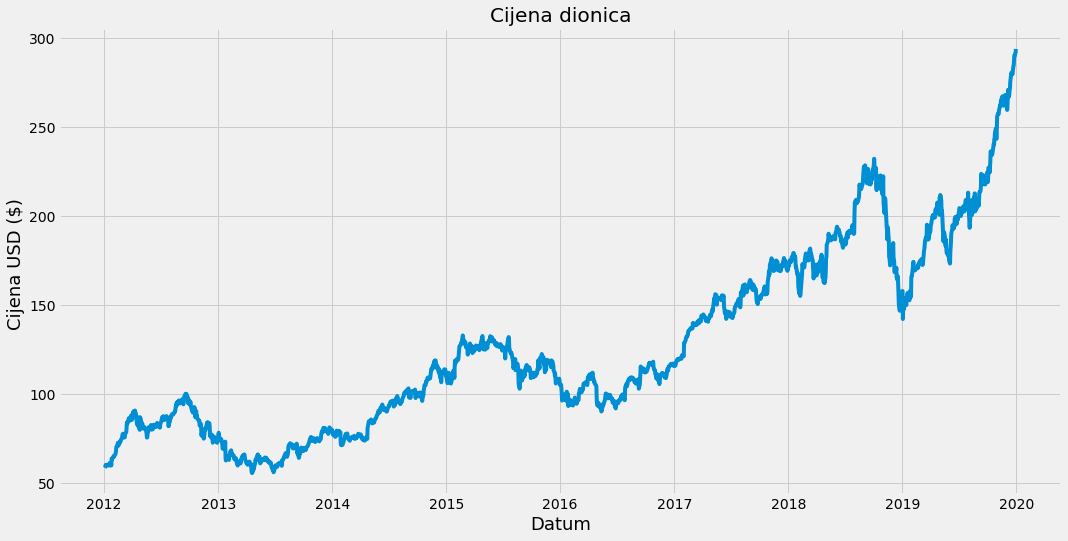

In [0]:
##Vizualizacija cijena dionica na dan zatvaranja
plt.figure(figsize=(16,8))
plt.title('Cijena dionica')
plt.plot(df['Close'])
plt.xlabel('Datum',fontsize=18)
plt.ylabel('Cijena USD ($) ',fontsize=18)
plt.show()

In [0]:
##Kreiranje novih podataka koji sadrže samo "Close" stupcem
data=df.filter(['Close'])
#Pretvaranje u numpy array
dataset=data.values
#Broj redaksa na kojima ćemo testirati model
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1610

In [0]:
#Skaliraje podataka
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.01243228],
       [0.0137596 ],
       [0.01651631],
       ...,
       [0.98381398],
       [0.99104513],
       [1.        ]])

In [0]:
#Kreiranje podataka za uvježbavanje
train_data=scaled_data[0:training_data_len,:]
##podijela podataka na x_train and y_train podatke
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.01243228, 0.0137596 , 0.01651631, 0.01914091, 0.01873851,
       0.0196454 , 0.01923099, 0.0185343 , 0.01758538, 0.02052227,
       0.02317089, 0.02235408, 0.01787967, 0.02214988, 0.01794572,
       0.0337113 , 0.03249209, 0.03408368, 0.03752507, 0.03960912,
       0.03943495, 0.03879233, 0.04153103, 0.04410756, 0.04702647,
       0.05174113, 0.06164491, 0.06179505, 0.06730851, 0.07142856,
       0.06434756, 0.06707427, 0.06702022, 0.07466578, 0.07357869,
       0.07559067, 0.07920624, 0.08121825, 0.08701398, 0.09123616,
       0.09245533, 0.09288177, 0.08566265, 0.0839209 , 0.08417917,
       0.09096586, 0.09287577, 0.0969778 , 0.10664737, 0.11954812,
       0.11713373, 0.11713972, 0.12646695, 0.12938582, 0.12730777,
       0.12540992, 0.12343396, 0.12999843, 0.1345029 , 0.13638876])]
[0.13172814323221588]



In [0]:
##Prebacivanje x_train i y_train u nupmy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [0]:
##reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1550, 60, 1)

In [0]:
#Kreiranje LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [0]:
##Uvježbavanje modela
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1550/1550 [==============================] - 129s 83ms/step - loss: 6.2074e-04


In [0]:
##Kreiranje podataka za uvježbavannje
##Create a new array containing scaled values form index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
##Kreiranje data sets x_test,y_test
x_test=[]
y_test=dataset[training_data_len: ,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [0]:
#Pretvaranje podataka u a numpy array
x_test=np.array(x_test)

In [0]:
#Shape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
##Predviđena cijena x_test dataset
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)                                                                                                   

In [0]:
##Root mean squared error (RMSE)
##rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

8.783787539227635

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


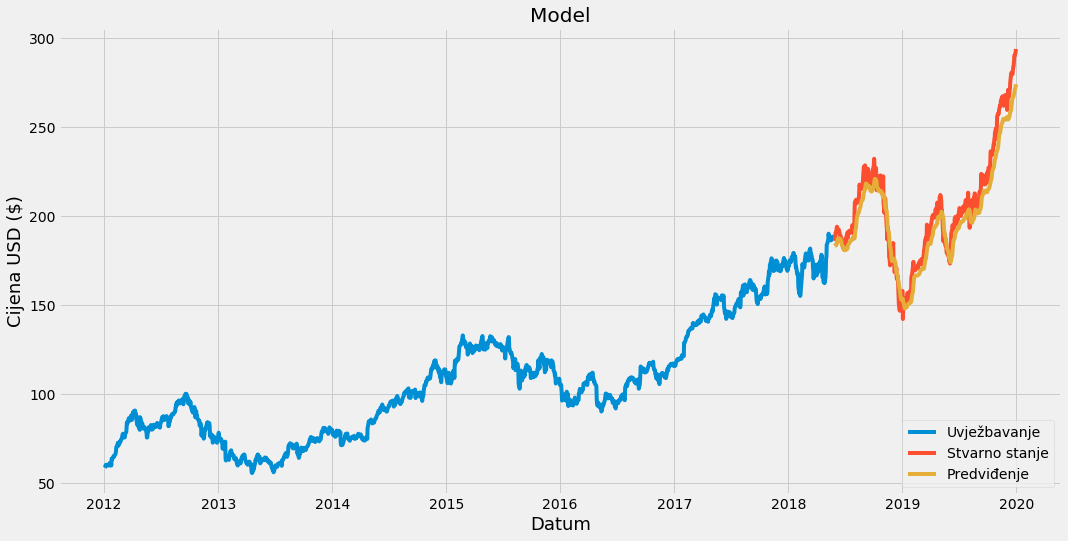

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Vizualizacija podataka
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Cijena USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Uvježbavanje', 'Stvarno stanje', 'Predviđenje'], loc='lower right')
plt.show()

In [0]:
#Prikaz stvarnih cijena i predviđenih cijena
valid

,Close,Predictions
Date,,
2018-05-29,187.899994,183.237793
2018-05-30,187.500000,183.400177
2018-05-31,186.869995,183.439560
2018-06-01,190.240005,183.334946
2018-06-04,191.830002,183.637955
...,...,...
2019-12-24,284.269989,267.793640
2019-12-26,289.910004,268.871704
2019-12-27,289.799988,270.547028


In [0]:
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-31')
##Create a newq dataframe
new_df=apple_quote.filter(['Close'])
##Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
##Create an empety list
X_test=[]
##Append the last 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
##Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
##undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[275.46936]]


In [0]:
##Get the quote 
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-31',end='2019-12-31')
print(apple_quote2['Close'])

Date
2019-12-31    293.649994
Name: Close, dtype: float64


In [0]:
##Ovo je bio dio programa koji je pokazao predviđene cijene koristeći LSTM,a sad ćemo pokazati kako istu stvar rade SVM i Linearna regresija

In [0]:

#Učitavanje podataka
from google.colab import files # učitavanje podataka na Google Colab
uploaded = files.upload() 
df = pd.read_excel('AAPL_stock_history2.xlsx')
df

Saving AAPL_stock_history2.xlsx to AAPL_stock_history2.xlsx


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,267269989,268250000,263450012,264160004,263534546,23621800
1,2019-12-03,258309998,259529999,256290009,259450012,258835724,28607600
2,2019-12-04,261070007,263309998,260679993,261739990,261120270,16795400
3,2019-12-05,263790009,265890015,262730011,265579987,264951172,18606100
4,2019-12-06,267480011,271000000,267299988,270709991,270069031,26518900
5,2019-12-09,270000000,270799988,264910004,266920013,266288025,32010600
6,2019-12-10,268600006,270070007,265859985,268480011,267844330,22605100
7,2019-12-11,268809998,271100006,268500000,270769989,270128906,19689200
8,2019-12-12,267779999,272559998,267320007,271459991,270817261,34327600
9,2019-12-13,271459991,275299988,270929993,275149994,274498535,33396900


In [0]:
#Kreiranje lista / x i y podataka zavisna i nezavisna varijabla
dates=[]
prices=[]


In [0]:
#Broj redaka i stupaca
df.shape

(21, 7)

In [0]:
#Zadnji redak u podatcima(za njega ćemo napraviti predviđanje)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2019-12-31,289929993,293679993,289519989,293649994,292954712,25201400


In [0]:
#Data set bez zadnjeg retka
df=df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,267269989,268250000,263450012,264160004,263534546,23621800
1,2019-12-03,258309998,259529999,256290009,259450012,258835724,28607600
2,2019-12-04,261070007,263309998,260679993,261739990,261120270,16795400
3,2019-12-05,263790009,265890015,262730011,265579987,264951172,18606100
4,2019-12-06,267480011,271000000,267299988,270709991,270069031,26518900
5,2019-12-09,270000000,270799988,264910004,266920013,266288025,32010600
6,2019-12-10,268600006,270070007,265859985,268480011,267844330,22605100
7,2019-12-11,268809998,271100006,268500000,270769989,270128906,19689200
8,2019-12-12,267779999,272559998,267320007,271459991,270817261,34327600
9,2019-12-13,271459991,275299988,270929993,275149994,274498535,33396900


In [0]:
#The new shape of the data
df.shape

(20, 7)

In [0]:
#Svi redci from the Date stupca
df_dates = df.loc[:, 'Date']
#Svi redci iz  Open stupca
df_open = df.loc[:, 'Open']

In [0]:
#Kreiranje nezavisnog seta podataka X
for date in df_dates:
  dates.append([int(date.split('-')[2])])
  
#Kreiranje zavisnog seta podataka 'y'
for open_price in df_open:
  prices.append(float(open_price))


In [0]:
##Dani koji su spremljeni u listu
print(dates)

[[2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26], [27], [30]]


In [0]:
def predict_prices(dates, prices, x):
  
  #Kreiranje 3 Support Vector Regression modela
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Uvježbavanje SVR modela 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Kreiranje Linear Regression modela
  lin_reg = LinearRegression()
  #uvježbavanje Linear Regression modela
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Dani')
  plt.ylabel('Cijene')
  plt.title('Regression')
  plt.legend()
  plt.show()

  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

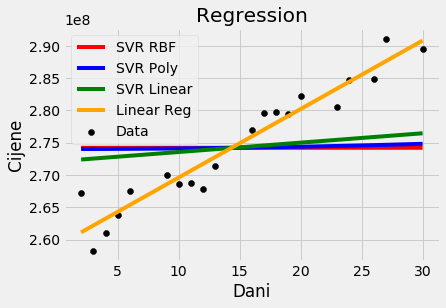

(274231638.9400956, 276477495.5, 274843689.7238016, 290826516.89273536)


In [0]:
#Predviđanje cijene na datum 31-12.2019.
predicted_price=predict_prices(dates,prices,[[30]])
print(predicted_price)